In [72]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

In [73]:
all_files=[]
import os
for root, dirs, files in os.walk("./"):
    for file in files:
        if file.endswith(".csv"):
             all_files.append(os.path.join(root, file))

In [74]:
dfs=[]
for path in all_files:
    df = pd.read_csv(path,index_col='datetime',sep=';',parse_dates=True)
    dfs.append(df)
print('Features:')
for col in dfs[2].columns:
    print('\t',col)

Features:
	 Accelerometer1RMS
	 Accelerometer2RMS
	 Current
	 Pressure
	 Temperature
	 Thermocouple
	 Voltage
	 Volume Flow RateRMS
	 anomaly
	 changepoint


If we need to load a specific type of experiments:

In [75]:
i,sum_an,sum_cp = 0,0,0
for df in dfs[1:]:
    sum_an += df.anomaly.sum()
    sum_cp += df.changepoint.sum()
    i +=1

In [76]:
i,sum_an,sum_cp

(34, 13241.0, 130.0)

In [77]:
# dfs=[]
# for path in all_files:
#     if 'valve2' in path:
#         df = pd.read_csv(path,index_col='datetime',sep=';',parse_dates=True)
#         dfs.append(df)
#         print(len(df),df.index[-1]-df.index[0])
#         plt.plot(df['Volume Flow RateRMS'][500:].rolling(5).mean().values,label=path)
# plt.legend()

**dfs** is the list of pandas.dataframes with experiments

# Statistical properties

In [78]:
from IPython.display import display

In [ ]:
#    for i in range(1, len(dfs)):
#        print(all_files[i].replace("/","\\"))
#        display(dfs[i].describe())
#        df = dfs[i]
#        fig, axes = plt.subplots(nrows=4, ncols=2)
#        color = iter(cm.gist_rainbow(np.linspace(0, 1, len(df.columns)-2)))
#        points = df.index[df['changepoint'] == 1].tolist()
#        for col, ax in zip(df.columns[0:8], axes.flatten()):
#            c = next(color)
#            ax.set_title(col, fontweight="bold")
#            ax.plot(df[col], c=c)
#            for p in points:
#                ax.axvline(p, color="black")
#            plt.subplots_adjust(wspace=.5, hspace=.5)
#        fig.set_facecolor('white')
#        fig.set_size_inches(15, 15)

Here is graph showing each variable across all experiments.

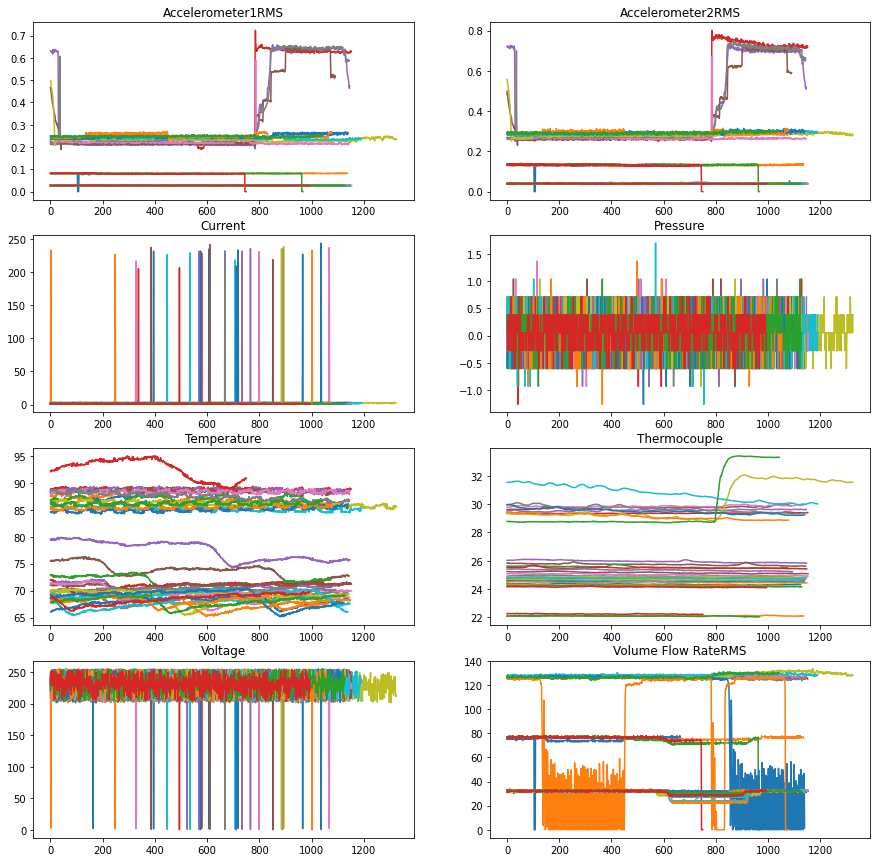

In [84]:
fig, axes = plt.subplots(nrows=4, ncols=2)
for col, ax in zip(dfs[1].columns[0:8], axes.flatten()):
    for i in range(1, len(dfs)):
        x = dfs[i].copy()
        x.reset_index(inplace=True)
        ax.plot(x[col])
    ax.set_title(col)
fig.set_facecolor('white')
fig.set_size_inches(15, 15)
